In [258]:
# Nome: Gustavo do Vale Ferreira
# RA: 22253081

# Imports

In [259]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Código

In [260]:
data = '/home/gugs881/faculdade/data/spotify-2023.csv'
df = pd.read_csv(data, encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [261]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [262]:
df.fillna(0, inplace=True)

In [263]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [264]:
audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                  'instrumentalness_%', 'liveness_%', 'speechiness_%']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[audio_features])

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

df['cluster'].value_counts()

cluster
0    303
3    222
2    169
4    130
1    129
Name: count, dtype: int64

In [265]:
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
            'instrumentalness_%', 'liveness_%', 'speechiness_%']

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

df_scaled.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516,3
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677,3
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516,3


In [266]:
similarity_matrix = cosine_similarity(df_scaled[features])

similarity_df = pd.DataFrame(similarity_matrix, index=df['track_name'], columns=df['track_name'])

similarity_df.head()


track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES,Sprinter,Ella Baila Sola,Columbia,fukumean,La Bebe - Remix,...,Privileged Rappers,The Astronaut,BackOutsideBoyz,Broke Boys,The Great War,My Mind & Me,Bigger Than The Whole Sky,A Veces (feat. Feid),En La De Ella,Alone
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),1.000000,0.975647,0.880344,0.913981,0.755991,0.936269,0.979482,0.910542,0.855850,0.865533,...,0.921663,0.858991,0.796932,0.741030,0.981515,0.805591,0.528567,0.970908,0.974293,0.943181
LALA,0.975647,1.000000,0.848438,0.876134,0.761163,0.916185,0.917155,0.908580,0.876697,0.819718,...,0.924463,0.890907,0.798221,0.775496,0.978372,0.707324,0.380635,0.984703,0.997566,0.970845
vampire,0.880344,0.848438,1.000000,0.947706,0.808084,0.877307,0.905297,0.879835,0.919387,0.880600,...,0.881834,0.918433,0.875415,0.865885,0.873215,0.860803,0.685082,0.804157,0.850583,0.881730
Cruel Summer,0.913981,0.876134,0.947706,1.000000,0.800570,0.910577,0.931923,0.837759,0.855452,0.922431,...,0.913622,0.914379,0.844334,0.835299,0.899534,0.808021,0.604323,0.850565,0.871277,0.871340
WHERE SHE GOES,0.755991,0.761163,0.808084,0.800570,1.000000,0.753580,0.754172,0.806952,0.811049,0.736370,...,0.765912,0.847082,0.707696,0.764178,0.775037,0.717606,0.529490,0.702161,0.759296,0.812195


In [267]:
def recomendar_musicas(track_name, similarity_df, df, top_n=5):

    if track_name not in similarity_df.index:
        raise ValueError(f"Música '{track_name}' não encontrada no dataset.")
    
    similar_scores = similarity_df[track_name].sort_values(ascending=False)
    
    similar_scores = similar_scores.drop(track_name)
    
    top_tracks = similar_scores.head(top_n).index
    
    return df[df['track_name'].isin(top_tracks)][['track_name', 'artist(s)_name', 'streams']]

recomendacoes = recomendar_musicas('Seven (feat. Latto) (Explicit Ver.)', similarity_df, df)
recomendacoes


,track_name,artist(s)_name,streams
39,TQM,Fuerza Regida,176553476
220,Las Morras,"BLESSD, Peso Pluma",127026613
308,Late Night Talking,Harry Styles,743693613
754,There's Nothing Holdin' Me Back,Shawn Mendes,1714490998
851,Daydreaming,Harry Styles,187703102


## Sistema de Recomendação com NLP

In [268]:
data = '/home/gugs881/faculdade/data/spotify-2023.csv'
df = pd.read_csv(data, encoding='ISO-8859-1')

df['musica_e_artista'] = df['track_name'] + ' ' + df['artist(s)_name']

tfidf = TfidfVectorizer(stop_words='english')

matriz_tfidf = tfidf.fit_transform(df['musica_e_artista'])

print(matriz_tfidf.shape)


(953, 2128)


In [269]:
similaridade_cosseno = cosine_similarity(matriz_tfidf, matriz_tfidf)

df_similaridade = pd.DataFrame(similaridade_cosseno, index=df['track_name'], columns=df['track_name'])

df_similaridade.head()


track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES,Sprinter,Ella Baila Sola,Columbia,fukumean,La Bebe - Remix,...,Privileged Rappers,The Astronaut,BackOutsideBoyz,Broke Boys,The Great War,My Mind & Me,Bigger Than The Whole Sky,A Veces (feat. Feid),En La De Ella,Alone
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.043793,0.0,0.0
LALA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
vampire,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
Cruel Summer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.270154,0.0,0.274127,0.000000,0.0,0.0
WHERE SHE GOES,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [270]:
def recomendar_musicas_nlp(nome_musica, df_similaridade, df, top_n=5):

    if nome_musica not in df_similaridade.index:
        raise ValueError(f"Música '{nome_musica}' não encontrada no dataset.")

    pontuacoes_similares = df_similaridade[nome_musica].sort_values(ascending=False)

    pontuacoes_similares = pontuacoes_similares.drop(nome_musica)

    musicas_recomendadas = pontuacoes_similares.head(top_n).index

    return df[df['track_name'].isin(musicas_recomendadas)][['track_name', 'artist(s)_name', 'streams']]

recomendacoes = recomendar_musicas_nlp('Seven (feat. Latto) (Explicit Ver.)', df_similaridade, df)
recomendacoes


,track_name,artist(s)_name,streams
16,Cupid - Twin Ver.,Fifty Fifty,496795686
62,Left and Right (Feat. Jung Kook of BTS),"Charlie Puth, BTS, Jung Kook",720434240
94,Still With You,Jung Kook,38411956
396,Dreamers [Music from the FIFA World Cup Qatar ...,"BTS, Jung Kook, FIFA Sound",323358833
650,Stay Alive (Prod. SUGA of BTS),Jung Kook,246376690


### Análise musical

In [271]:
def recomendar_musicas_nlp_por_musica(nome_musica, df_similaridade, df, top_n=5):
    if nome_musica not in df_similaridade.index:
        raise ValueError(f"Música '{nome_musica}' não encontrada no dataset.")

    pontuacoes_similares = df_similaridade[nome_musica].sort_values(ascending=False)
    pontuacoes_similares = pontuacoes_similares.drop(nome_musica)

    musicas_recomendadas = pontuacoes_similares.head(top_n).index

    recomendacoes = df[df['track_name'].isin(musicas_recomendadas)][['track_name', 'artist(s)_name', 'streams', 'bpm', 'danceability_%', 'energy_%']]

    analise_musical = {
        'Média de Danceability': recomendacoes['danceability_%'].dropna().mean(),
        'Média de Energy': recomendacoes['energy_%'].dropna().mean(),
        'Média de BPM': recomendacoes['bpm'].dropna().mean()
    }
    return analise_musical

analise_musical_por_musica = recomendar_musicas_nlp_por_musica('Seven (feat. Latto) (Explicit Ver.)', df_similaridade, df)
print("Análise musical (baseada na música):", analise_musical_por_musica)

Análise musical (baseada na música): {'Média de Danceability': 68.2, 'Média de Energy': 65.8, 'Média de BPM': 110.8}


### Comparação de plataformas

In [272]:
def comparar_plataformas_nlp_por_musica(nome_musica, df_similaridade, df, top_n=5):
    if nome_musica not in df_similaridade.index:
        raise ValueError(f"Música '{nome_musica}' não encontrada no dataset.")

    pontuacoes_similares = df_similaridade[nome_musica].sort_values(ascending=False)
    pontuacoes_similares = pontuacoes_similares.drop(nome_musica)

    musicas_recomendadas = pontuacoes_similares.head(top_n).index

    recomendacoes = df[df['track_name'].isin(musicas_recomendadas)][['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts']]

    comparacao_plataformas = recomendacoes[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts']].sum().to_dict()
    
    return comparacao_plataformas

comparacao_plataformas = comparar_plataformas_nlp_por_musica('Seven (feat. Latto) (Explicit Ver.)', df_similaridade, df)
print("Comparação de plataformas:", comparacao_plataformas)

Comparação de plataformas: {'in_spotify_playlists': 7559, 'in_apple_playlists': 146, 'in_deezer_playlists': '78483520', 'in_shazam_charts': '000211'}


### Impacto do Artista

In [273]:
def impacto_artista_nlp(nome_artista, df, df_similaridade, top_n=5):

    musicas_do_artista = df[df['artist(s)_name'].str.contains(nome_artista, case=False, na=False)]

    if musicas_do_artista.empty:
        raise ValueError(f"Artista '{nome_artista}' não encontrado no dataset.")

    primeira_musica_do_artista = musicas_do_artista.iloc[0]['track_name']

    if primeira_musica_do_artista not in df_similaridade.index:
        raise ValueError(f"Música '{primeira_musica_do_artista}' não encontrada no dataset de similaridade.")

    pontuacoes_similares = df_similaridade[primeira_musica_do_artista].sort_values(ascending=False)
    pontuacoes_similares = pontuacoes_similares.drop(primeira_musica_do_artista)

    musicas_recomendadas = pontuacoes_similares.head(top_n).index

    recomendacoes = df[df['track_name'].isin(musicas_recomendadas)][['track_name', 'artist(s)_name', 'streams', 'artist_count']]

    recomendacoes['streams'] = pd.to_numeric(recomendacoes['streams'], errors='coerce')
    recomendacoes['artist_count'] = pd.to_numeric(recomendacoes['artist_count'], errors='coerce')

    impacto = recomendacoes.groupby('artist_count')['streams'].mean().to_dict()
    
    return impacto

impacto_artista = impacto_artista_nlp('Jung Kook', df, df_similaridade)
print("Impacto do artista:", impacto_artista)

Impacto do artista: {1: 260528110.66666666, 3: 521896536.5}


### Tendências temporais

In [274]:
def tendencias_temporais_nlp(nome_musica, df_similaridade, df, top_n=5):
    if nome_musica not in df_similaridade.index:
        raise ValueError(f"Música '{nome_musica}' não encontrada no dataset.")

    pontuacoes_similares = df_similaridade[nome_musica].sort_values(ascending=False)
    pontuacoes_similares = pontuacoes_similares.drop(nome_musica)

    musicas_recomendadas = pontuacoes_similares.head(top_n).index

    recomendacoes = df[df['track_name'].isin(musicas_recomendadas)][['track_name', 'artist(s)_name', 'streams', 'released_year', 'danceability_%', 'energy_%', 'bpm']]

    recomendacoes['danceability_%'] = pd.to_numeric(recomendacoes['danceability_%'], errors='coerce')
    recomendacoes['energy_%'] = pd.to_numeric(recomendacoes['energy_%'], errors='coerce')
    recomendacoes['bpm'] = pd.to_numeric(recomendacoes['bpm'], errors='coerce')
    recomendacoes['streams'] = pd.to_numeric(recomendacoes['streams'], errors='coerce')

    recomendacoes['released_year'] = pd.to_numeric(recomendacoes['released_year'], errors='coerce').fillna(0).astype(int)

    print("Tipos de dados após a conversão:")
    print(recomendacoes.dtypes)

    print("\nValores antes do agrupamento:")
    print(recomendacoes.head())

    recomendacoes_numericas = recomendacoes.drop(columns=['track_name', 'artist(s)_name'])

    try:

        tendencias_temporais = recomendacoes_numericas.groupby('released_year').mean()[['danceability_%', 'energy_%', 'bpm']].to_dict('index')
        return tendencias_temporais
    except Exception as e:
        print("\nErro ao agrupar:")
        print(str(e))
        return None

tendencias = tendencias_temporais_nlp('Seven (feat. Latto) (Explicit Ver.)', df_similaridade, df)
print("\nTendências temporais:", tendencias)

Tipos de dados após a conversão:
track_name        object
artist(s)_name    object
streams            int64
released_year      int64
danceability_%     int64
energy_%           int64
bpm                int64
dtype: object

Valores antes do agrupamento:
                                            track_name  \
16                                   Cupid - Twin Ver.   
62             Left and Right (Feat. Jung Kook of BTS)   
94                                      Still With You   
396  Dreamers [Music from the FIFA World Cup Qatar ...   
650                     Stay Alive (Prod. SUGA of BTS)   

                   artist(s)_name    streams  released_year  danceability_%  \
16                    Fifty Fifty  496795686           2023              78   
62   Charlie Puth, BTS, Jung Kook  720434240           2022              88   
94                      Jung Kook   38411956           2020              53   
396    BTS, Jung Kook, FIFA Sound  323358833           2022              71   
650

### Presença em várias plataformas

In [275]:
def presenca_plataformas_nlp(nome_musica, df_similaridade, df, top_n=5):
    if nome_musica not in df_similaridade.index:
        raise ValueError(f"Música '{nome_musica}' não encontrada no dataset.")

    pontuacoes_similares = df_similaridade[nome_musica].sort_values(ascending=False)
    pontuacoes_similares = pontuacoes_similares.drop(nome_musica)

    musicas_recomendadas = pontuacoes_similares.head(top_n).index

    recomendacoes = df[df['track_name'].isin(musicas_recomendadas)][['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts']]

    correlacao_plataformas = recomendacoes[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts']].corr().to_dict()
    
    return correlacao_plataformas

presenca_plataformas = presenca_plataformas_nlp('Seven (feat. Latto) (Explicit Ver.)', df_similaridade, df)
print("Presença nas plataformas:", presenca_plataformas)

Presença nas plataformas: {'in_spotify_playlists': {'in_spotify_playlists': 1.0, 'in_apple_playlists': 0.8362241117706277, 'in_deezer_playlists': 0.3884281167110786, 'in_shazam_charts': -0.2660789789315569}, 'in_apple_playlists': {'in_spotify_playlists': 0.8362241117706277, 'in_apple_playlists': 1.0, 'in_deezer_playlists': 0.7803852852025018, 'in_shazam_charts': -0.29294296380544577}, 'in_deezer_playlists': {'in_spotify_playlists': 0.3884281167110786, 'in_apple_playlists': 0.7803852852025018, 'in_deezer_playlists': 1.0, 'in_shazam_charts': 0.10518806540293148}, 'in_shazam_charts': {'in_spotify_playlists': -0.2660789789315569, 'in_apple_playlists': -0.29294296380544577, 'in_deezer_playlists': 0.10518806540293148, 'in_shazam_charts': 1.0}}


## Gráficos

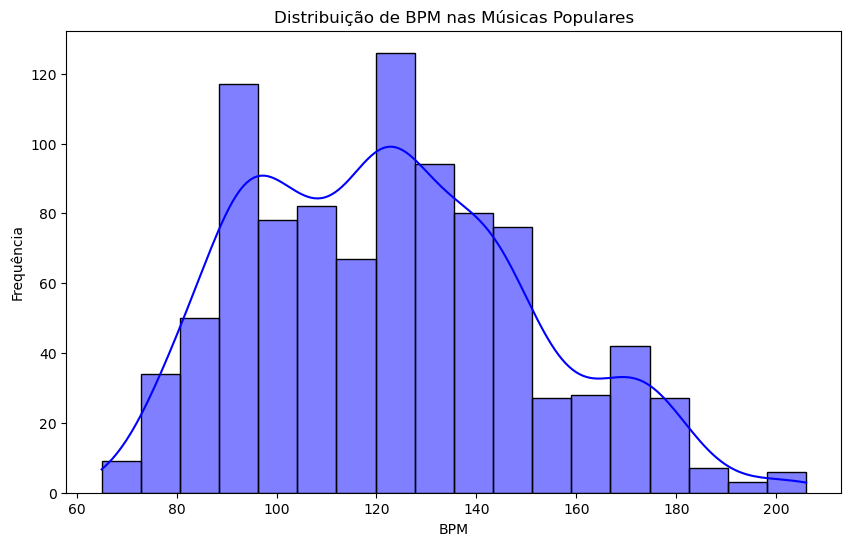

In [276]:
audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                  'instrumentalness_%', 'liveness_%', 'speechiness_%']

plt.figure(figsize=(10, 6))
sns.histplot(df['bpm'], kde=True, color='blue')
plt.title('Distribuição de BPM nas Músicas Populares')
plt.xlabel('BPM')
plt.ylabel('Frequência')
plt.show()

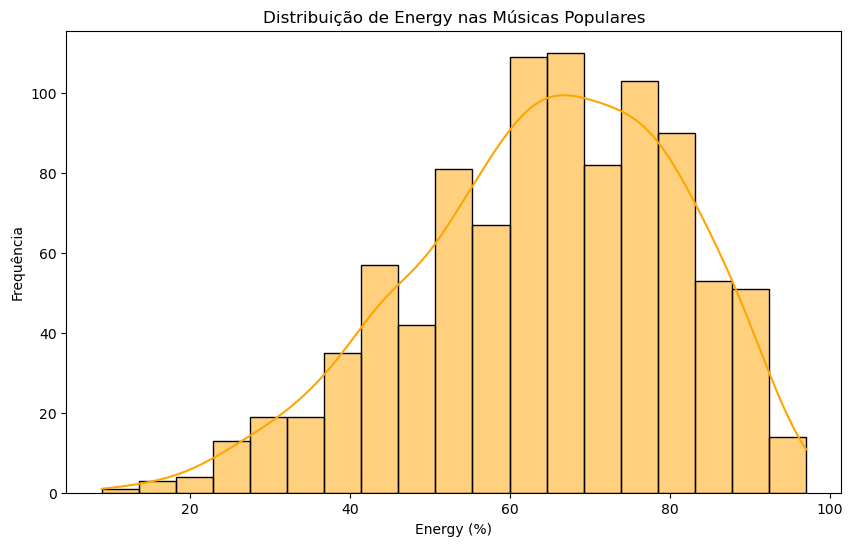

In [277]:
plt.figure(figsize=(10, 6))
sns.histplot(df['energy_%'], kde=True, color='orange')
plt.title('Distribuição de Energy nas Músicas Populares')
plt.xlabel('Energy (%)')
plt.ylabel('Frequência')
plt.show()


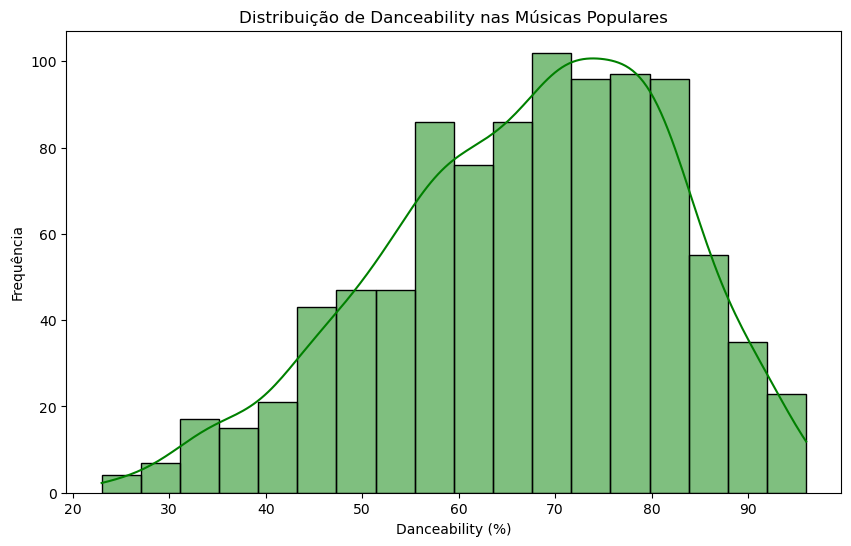

In [278]:
plt.figure(figsize=(10, 6))
sns.histplot(df['danceability_%'], kde=True, color='green')
plt.title('Distribuição de Danceability nas Músicas Populares')
plt.xlabel('Danceability (%)')
plt.ylabel('Frequência')
plt.show()

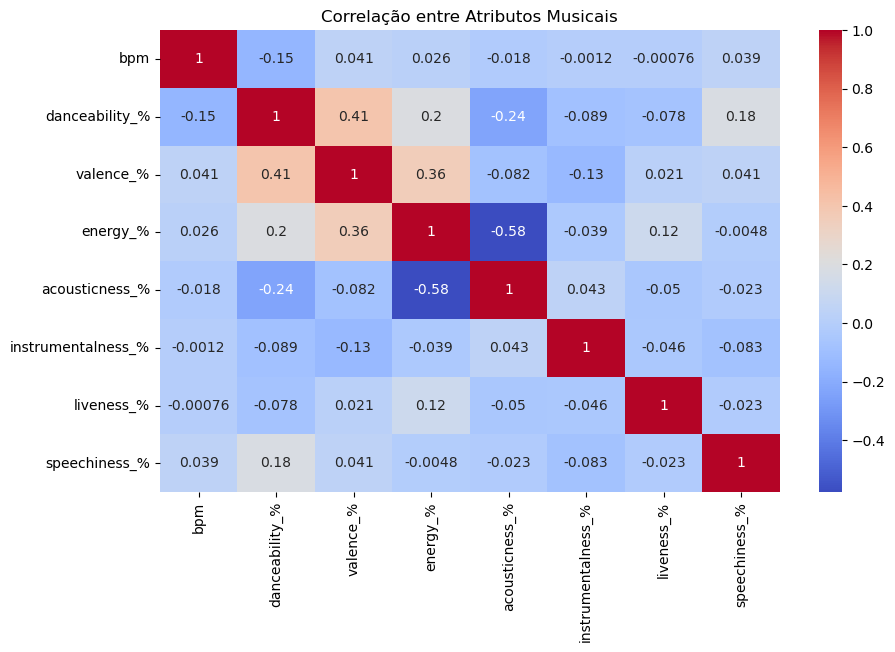

In [279]:
correlacao = df[audio_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Correlação entre Atributos Musicais')
plt.show()


/tmp/ipykernel_1316/2159918414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularidade_plataformas.index, y=popularidade_plataformas.values, palette='dark')


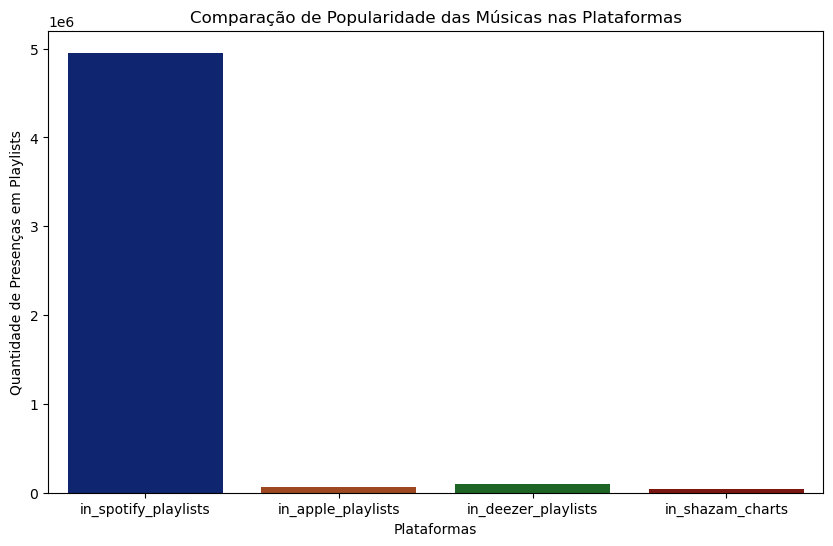

In [280]:
plataformas = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_shazam_charts']

popularidade_plataformas = df[plataformas].apply(pd.to_numeric, errors='coerce').sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=popularidade_plataformas.index, y=popularidade_plataformas.values, palette='dark')
plt.title('Comparação de Popularidade das Músicas nas Plataformas')
plt.xlabel('Plataformas')
plt.ylabel('Quantidade de Presenças em Playlists')
plt.show()


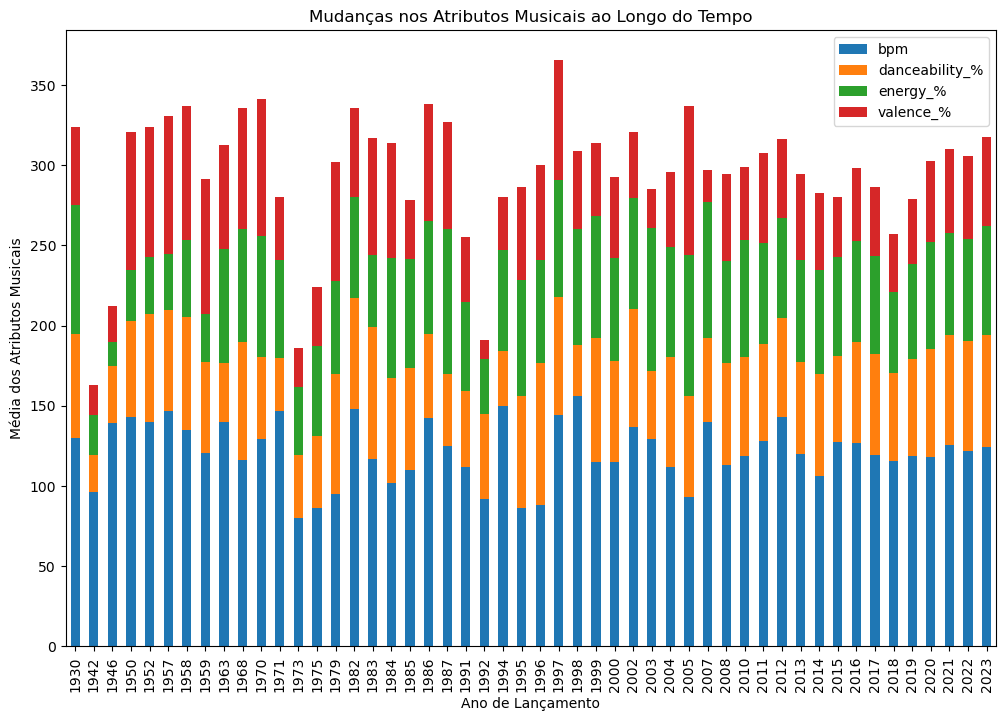

In [281]:
audio_features = ['bpm', 'danceability_%', 'energy_%', 'valence_%']
df_temporal = df.groupby('released_year')[audio_features].mean()

df_temporal.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Mudanças nos Atributos Musicais ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média dos Atributos Musicais')
plt.show()
